In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
stat_no_ROI   = "./no_ROI/model_backup/stats_densenet121_e10_bs10_17-09-2021_10:20:37.json"
stat_with_ROI = "./with_ROI/model_backup/stats_densenet121_e10_bs10_15-09-2021_12:20:45.json"


In [115]:
def metrics_plot(file):
    stat_file = pd.read_json(file)
    stat_cleaned = stat_file[stat_file["batch_number"]==1010]
    plt.figure()
    x_axis = stat_cleaned["epoch"]
    for keys in ["train_loss","val_loss"]:
        y_axis = stat_cleaned[keys]
        plt.plot(x_axis,y_axis,"o-",label = keys)
        plt.annotate(round(y_axis.iloc[0],3),xy= (x_axis.iloc[0],y_axis.iloc[0]),xytext = (x_axis.iloc[0]+0.5,y_axis.iloc[0]),
                    arrowprops = dict(arrowstyle="->",connectionstyle = "arc3")
                    )
        plt.annotate(round(y_axis.iloc[-1],3),xy= (x_axis.iloc[-1],y_axis.iloc[-1]),xytext = (x_axis.iloc[-1]+0.5,y_axis.iloc[-1]),
                    arrowprops = dict(arrowstyle="->",connectionstyle = "arc3")
                    )
    plt.legend(loc = "upper right")
    plt.title("Loss")
    plt.xlabel("num_epoch")
    plt.ylabel("cross_entropy_loss")
    plt.grid(True)
    plt.yticks(np.arange(0,1,step=0.2))
    plt.show()

    plt.figure()
    for keys in ["precision","recall","accuracy","AUC","F1"]:
        y_axis = stat_cleaned[keys]
        plt.plot(x_axis,y_axis,"o-",label = keys)
        plt.annotate(round(y_axis.iloc[0],3),xy= (x_axis.iloc[0],y_axis.iloc[0]),xytext = (x_axis.iloc[0]+0.5,y_axis.iloc[0]),
                    arrowprops = dict(arrowstyle="->",connectionstyle = "arc3")
                    )
        plt.annotate(round(y_axis.iloc[-1],3),xy= (x_axis.iloc[-1],y_axis.iloc[-1]),xytext = (x_axis.iloc[-1]+0.5,y_axis.iloc[-1]),
                    arrowprops = dict(arrowstyle="->",connectionstyle = "arc3")
                    )
    plt.legend(loc = "lower left")
    plt.title("Metric")
    plt.xlabel("num_epoch")
    plt.ylabel("metric")
    plt.grid(True)
    plt.yticks(np.arange(0,1,step=0.2))
    plt.show()

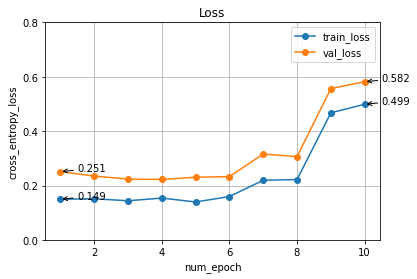

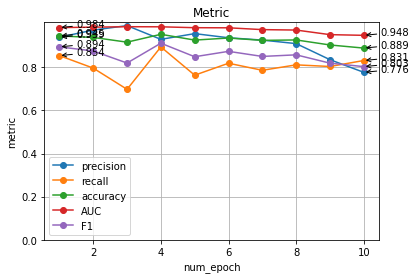

In [116]:
metrics_plot(stat_no_ROI)

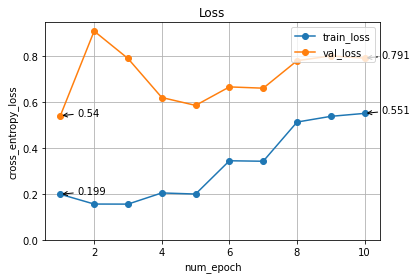

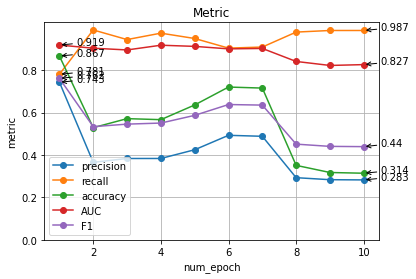

In [117]:
metrics_plot(stat_with_ROI)